# Data Exploration

We recorded some data and want to check out if it's usable for data analysis.

Let's start with importing some plotting functions (don't care about the warning ... we should use something else, but this is just easier, for the time being).

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

#use a nicer plotting style
plt.style.use(u'seaborn-talk')
print(plt.style.available)

Populating the interactive namespace from numpy and matplotlib
['dark_background', 'seaborn-whitegrid', 'seaborn-muted', 'seaborn-notebook', 'seaborn-bright', 'seaborn-paper', 'seaborn-colorblind', 'seaborn-darkgrid', 'seaborn-dark-palette', 'fivethirtyeight', 'seaborn-dark', 'ggplot', 'bmh', 'seaborn-ticks', 'seaborn-talk', 'seaborn-white', 'seaborn-poster', 'classic', 'seaborn-pastel', 'seaborn-deep', 'grayscale']


## Walking versus not Walking
reading in accelerometer data from the file

In [4]:
data = pd.read_csv('./data/2017-08-08 02.37.46 +0000_Accel.txt',delimiter='\t',skiprows=17,names=['time','skipped','ax','ay','az','label'])


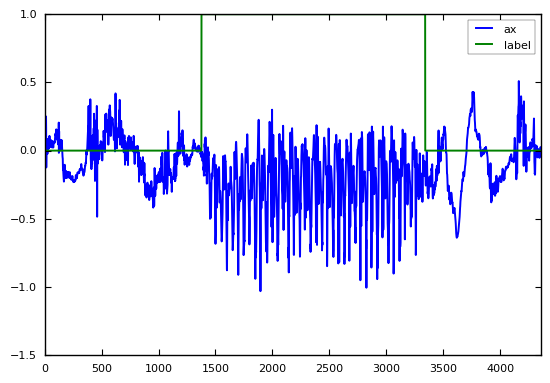

In [8]:
data[['ax','label']].plot()


In [11]:
accel_walking = data[data['label']==1][['ax','ay','az']]
accel_other = data[data['label']==0][['ax','ay','az']]


In [33]:
#calculating a sliding window ...
from pandas.stats.moments import rolling_apply
mean_walking = accel_walking.rolling(200).apply(var).dropna()
mean_other = accel_other.rolling(200).apply(var).dropna()



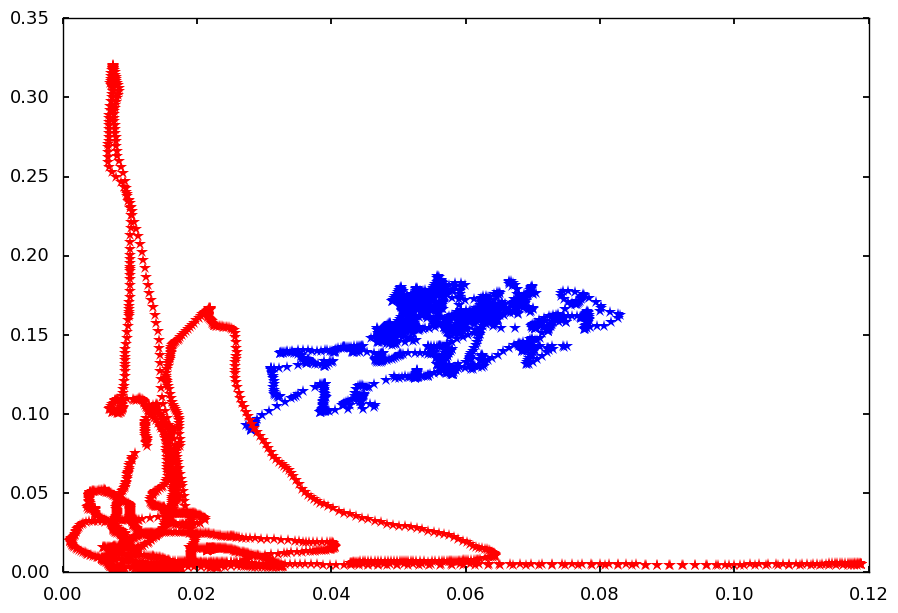

In [34]:
plot(mean_walking['ax'], mean_walking['ay'], '*')
plot(mean_other['ax'], mean_other['ay'],'*r')



## Motion Data

The assembly.dat file contains a recording done from a assembly session.

A person was doing the following activities: 

* hammering in nails (label 1)
* screwdring (label 2)
* sandpapering (label 3)
* sawing (label 4)

Label 0 is for doing none of the activities above. The sensor is attached to the subjects right wrist (x axis pointing towards the fingers). 
The sensor was sampled with 100 Hz, it's raw sensor data (not calibrated). The data structure of the file is shown in the header of the file.

## Import the data

The file uses tabs as separators and we need to skip 11 rows (the description of the content). 
Also we need to give the desciription for each column in the names variable.

In [35]:
data = pd.read_csv('./data/assembly.dat',delimiter='\t',skiprows=11,names=['s','usec','ax','ay','az','gx','gy','gz','mx','my','mz','label'])

FileNotFoundError: File b'./data/assembly.dat' does not exist